Homework #4
=======


### Instructions / Notes:

**_Read these carefully_**

* **Please read all the points of the "Notes" sections- they're important for this Homework!!!**
* You **are not required to do any plotting in this PS- only in certain problems to provide the tuples that would generate a plot.**  You can then optionally plot (in the notebook with matplotlib, in Excel, wherever works)
* You **may** create new IPython notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!- **just make sure that your final answer for each question is _in its own cell_ and _clearly indicated_**
* **See CS360_2017S@Facebook for submission instructions **
* _Have fun!_

Problem 1: Double Trouble
------------------------
**_[50% points]_**

In this problem we'll explore an optimization often referred to as **_double buffering_**, which we'll use to speed up the **external merge sort algorithm** we saw in _Ch. 9_.

Although we haven't explicitly modeled it in many of our calculations so far, recall that _sequential IO_ (i.e. involving reading from / writing to consecutive pages) is generally much faster that _random access IO_ (any reading / writing that is not sequential). Additionally, on newer memory technologies like SSD reading data can be faster than writing data (if you want to read more about SSD access patterns look [here](http://codecapsule.com/2014/02/12/coding-for-ssds-part-5-access-patterns-and-system-optimizations/). 

In other words, for example, if we read 4 consecutive pages from file $A$, this should be much faster than reading 1 page from $A$, then 1 page from file $B$, then the next page from $A$.

**In this problem, we will begin to model this, by assuming that 3/4 sequential _READS_ are "free", i.e. the total cost of $4$ sequential reads is $1$ IO. We will also assume that the writes are always twice as expensive as a read. Sequential writes are never free, therefore the cost of $N$ writes is always $2N$.**

### Other important notes:
* **NO REPACKING:** Consider the external merge sort algorithm using the basic optimizations we present in Ch. 9, but do not use the repacking optimization covered in Ch. 9.
* **ONE BUFFER PAGE RESERVED FOR OUTPUT:** Assume we use one page for output in a merge, e.g. a $B$-way merge would require $B+1$ buffer pages
* **REMEMBER TO ROUND:** Take ceilings (i.e. rounding up to nearest integer values) into account in this problem for full credit!  Note that we have sometimes omitted these (for simplicity) in lecture.
* **Consider worst case cost:** In other words, if 2 reads _could happen_ to be sequential, but in general might not be, consider these random IO

### Part (a)

**_[30% points]_**

Consider a modification of the external merge sort algorithm where **reads are always read in 4-page chunks (i.e. 4 pages sequentially at a time)** so as to take advantage of sequential reads. Calculate the cost of performing the external merge sort for a setup having $B+1=20$ buffer pages and an unsorted input file with $160$ pages.

Show the steps of your work and make sure to explain your reasoning by writing them as python comments above the final answers.

#### Part (a.i)

What is the **exact** IO cost of spliting and sorting the files? As is standard we want runs of size $B+1$.

In [1]:
io_split_sort = 360
# IO Read : 160/(4-chunk)
# IO Write : 160 * 2 (write cost)

#### Part (a.ii)

After the file is split and sorted, we can merge $n$ runs into 1 using the merge process. What is largest $n$ we could have, given reads are always read in 4-page chunks? Note: this is known as the arity of the merge.

In [2]:
merge_arity = 4
# let x arity -> 4*x+1 buffers need and has 20 buffer pages 
# max x is 4 

#### Part (a.iii)

How many passes of merging are required?

In [72]:
merge_passes = 2
# math.ceiling(log(8,4(base)))

#### Part (a.iv)

What is the IO cost of the first pass of merging? Note: the highest arity merge should always be used.

In [ ]:
merge_pass_1 = 360
# IO Read : 160/(4-chunk)
# IO Write : 160 * 2 (write cost)

#### Part (a.v)

What is the total IO cost of running this external merge sort algorithm? **Do not forget to add in the remaining passes (if any) of merging.**

In [ ]:
total_io = 1080 
# IO cost of pass_1 = 360 
# IO cost of pass_2 = 360 
# io_split_sort = 360

### Part (b)

**_[10% points]_**

Now, we'll generalize the reasoning above by writing a python function that computes the _approximate_* cost of performing this version of external merge sort for a setup having $B+1$ buffer pages, a file with $N$ pages, and where we now read in $P$-page chunks (replacing our fixed 4 page chunks in Part (a)).

**Note: our approximation will be a small one- for simplicity, we'll assume that each pass of the merge phase has the same IO cost, when actually it can vary slightly... Everything else will be exact given our model!* 

We'll call this function `external_merge_sort_cost(B,N,P)`, and we'll compute it as the product of the cost of reading in and writing out all the data (which we do each pass), and the number of passes we'll have to do.

Even though this is an approximation, **make sure to take care of floor / ceiling operations- i.e. rounding down / up to integer values properly!**

**Importantly, to simplify your calculations: Your function will only be evaluated on cases where the following hold:**
* **(B + 1) % P == 0** (i.e. the buffer size is divisible by the chunk size)
* **N % (B + 1) == 0** (i.e. the file size is divisible by the buffer size)

#### Part (b.i)

First, let's write a python function that computes the **exact** total IO cost to create the initial runs:

In [20]:
import math
def cost_initial_runs(B, N, P):
    # YOUR CODE HERE
    # IO Read = N/P (N % P = 0 by assumption)
    # IO Write = 2*N
    return 2*N + N/P

#### Part (b.ii)

Next, let's write a python function that computes the _approximate_* total IO cost to read in and then write out all the data during one pass of the merge:

In [21]:
def cost_per_pass(B, N, P):
    # YOUR CODE HERE
    # IO Read = N/P (N % P = 0 by assumption)
    # IO Write = 2*N
    return 2*N + N/P

**Note that this is an approximation: when we read in chunks during the merge phase, the cost per pass actually varies slightly due to 'rounding issues'  when the file is split up into runs... but this is a small difference*

#### Part (b.iii)

Next, let's write a python function that computes the **exact** total number of passes we'll need to do

In [22]:
def num_passes(B, N, P):
    # YOUR CODE HERE
    # arity = floor of (B/P)
    # num passes = log of (N/(B+1)) in base arity
    return math.ceil( math.log((N/(B+1)), math.floor(B/P)))

Finally, our total cost function is:

In [18]:
def external_merge_sort_cost(B, N, P):
    return cost_initial_runs(B,N,P) + cost_per_pass(B,N,P)*num_passes(B,N,P)

### Part (c)

**_[10% points]_**

For $B + 1 =100$ and $N=900$, find the optimal $P$ according to your IO cost equation above.  Return both the optimal $P$ value (`P_opt`) and the list of tuples **_for feasible values of $P$_** that would generate a plot of P vs. IO cost, at resolution $=1$(every value of P), stored as `points`:

In [28]:
B = 99
N = 900
temp = range(1, int(B/2))

# let me show only feasible values of P 
P_list = []
for p in temp:
    if (N%p==0):
        P_list.append((p, external_merge_sort_cost(B, N, p)))
#print(P_list)
# Save the optimal value here
P = min(P_list, key = lambda t: t[1])[0]
print(P)
# Save a list of tuples of (P, io_cost) here, for all feasible P's
points = P_list

10


*Below we provide starter code for using `matplotlib` in the notebook, if you want to generate the graph of P vs. IO cost; however any other software that allows you to visualize the plot (Excel, Google spreadsheets, MATLAB, etc) is fine!

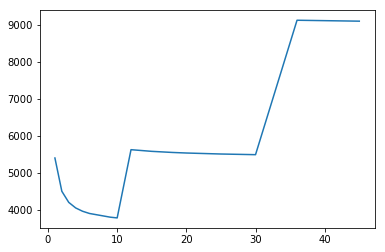

In [29]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*points))
plt.show()

Problem 2: IO Cost Models
--------------------------------------

**_[30% points]_**

In this problem we consider different join algorithms when joining relations $R(A,B)$,$S(B,C)$, and $T(C,D)$. We want to investigate the cost of various pairwise join plans and try to determine the best join strategy given some conditions.

Specifically, for each part of this question, we are intereseted determining some (or all) of the following variables:

* `P_R`: Number of pages of $R$
* `P_S`: Number of pages of $S$
* `P_RS`: Number of pages of output (and input) $RS$
* `P_T`: Number of pages of $T$
* `P_RST`: Number of pages of output (and input) $RS$
* `B`: Number of pages in buffer
* `IO_cost_join1`: Total IO cost of first join
* `IO_cost_join2`: Total IO cost of second join

#### Note:
* ** The output of join1 is always feed as one of the inputs to join 2 ** 
* **Use the "vanilla" versions of the algorithms as presented in lecture, _i.e. without any of the optimizations we mentioned_**
* **Again assume we use one page for output, as in lecture!**
* ** The abbreviates for the joins used are Sort-Merge Join (SMJ), Hash Join (HJ), and Block Nested Loop Join (BNLJ). **

### Part (a)

**_[15% points]_**

Given:
* `P_R`: 10
* `P_S`: 100
* `P_T`: 1000
* `P_RS`: 50
* `P_ST`: 500
* `P_RST`: 250
* `B`: 32

Compute the IO cost for the following query plans:

* IO_Cost_HJ_1 where only hash join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_HJ_2 where only hash join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_SMJ_1 where only sort merge join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_SMJ_2 where only sort merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_BNLJ_1 where only block nested loop join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_BNLJ_2 where only block nested loop merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

**Note: again, be careful of rounding for this problem. Use ceiling/floors whenever it is necessary.**

Include 1-2 sentences (as a python comment) above each answer explaining the performance for each algorithm/query plan.

In [ ]:
IO_Cost_HJ_1 = 3560
# IO(join1) = P_R + P_S + P_RS = 10 + 100 + 50 
# join1 : OUT = 160
# IO(join2) = 3*(P_RS + P_T) + P_RST = 3*(50 + 1000) + 250 
# join2 : OUT = 3400
# Total = 160 + 3400 = 3560

IO_Cost_HJ_2 = 4560
# in the Same Process, IO_Cost_HJ_1 
# IO(join1) = 3*(100 + 1000) + 500 
# join1 : OUT = 3800
# IO(join2) = 500 + 10 + 250 
# join2 : OUT = 760
# Total = 3800 + 760 = 4560

IO_Cost_SMJ_1 = 8080
# CASE join1,
# Sort R : 1 pass(R/W) = 2^1 * 10 = 20
# Sort S : 2 pass(R/W) = 2^2 * 100 = 400
# Merging : 1 pass(R) = 10 + 100 = 110
# Total IO Cost of join1 = 20 + 400 + 110 + 50 = 580
# CASE join2, 
# Sort RS : 2 pass(R/W) = 2^2 * 50 = 200
# Sort T : 3 pass(R/W), (B * (B - 1) = 992 < 1000) -> 6 * 1000 = 6000
# Merging : 1 pass(R) = 50 + 1000 = 1050
# Total IO Cost of join2 = 200 + 6000 + 1050 + 250 = 7500
# Total = 580 + 7500 = 8080

IO_Cost_SMJ_2 = 10780
# in the Same Process, IO_Cost_SMJ_1 
# CASE join1,
# Sort T : 3 pass(R/W) = 6000
# Sort S : 2 pass(R/W) = 400
# Merging : 1 pass(R) = 1000 + 100 = 1100
# Total IO Cost of join1 =6000 + 400 + 1100 + 500 = 8000
# CASE join2, 
# Sort ST : 2 pass(R/W) = 2^2 * 500 = 2000
# Sort R : 1 pass(R/W) = 20
# Merging : 1 pass(R) = 500 + 10 = 510
# Total IO Cost of join2 = 2000 + 20 + 510 + 250 = 2780
# Total = 8000 + 2780 = 10780

IO_Cost_BNLJ_1 = 2460
# IO Cost = P(R) + (P(R)/(B-1))*P(S) + OUT
# join1 = 10 + ceiling(10/31) * 100 + 50 = 160
# join2 = 50 + ceiling(50/31) * 1000 + 250 = 2300
# Total = 160 + 2300 = 2460


IO_Cost_BNLJ_2 = 5360
# join1 = 100 + ceiling(100/31) * 1000 + 500 = 4600
# join2 = 10 + ceiling(10/31) * 500 + 250 = 760
# Total = 4600 + 760 = 5360


### Part (b)
**_[15% points]_**

For the query plan where $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$ find a configuration where using HJ for $join1$ and SMJ for $join2$ is cheaper than SMJ for $join1$ and HJ for $join2$. The output sizes you choose for P_RS and P_RS must be non-zero and feasible (e.g. the maximum output size of $join1$ is P_R*P_S). 

In [ ]:
P_R = 10
P_S = 2000
P_T = 50
P_RS = 50
P_RST = 25
B = 16

HJ_IO_Cost_join1 = 7080
SMJ_IO_Cost_join2 = 525

SMJ_IO_Cost_join1 = 14080
HJ_IO_Cost_join2 = 325


Problem 3: Sequential Flooding
-----------------------------

**_[20% points]_**

**Note: Before doing this question, it is highly recommended that you go through Pr_12, which covers eviction policies for buffer managers such as LRU, and why _sequential flooding_ can sometimes occurs with LRU.**

In the activity accompanying Ch. 12, we saw something called _sequential flooding_ that can occur when a default eviction policy (for example LRU) is used by the buffer manager.  We saw that we can achieve much lower IO cost by using a different eviction policy, MRU ("most recently used").

**Note that "Most recently used" means most recently accessed, either from buffer or disk, consistent with what we showed in Pr-12.**

For this problem, we will take a closer look at the IO cost of different eviction policies when reading the pages of a file sequentially multiple times. 


### Part (a.i)
**_[2% point]_**

Write a python function `lru_cost(N,M,B)` that computes the IO cost of the LRU eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages.  Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [41]:
def lru_cost(N, M, B):
    # YOUR CODE HERE
    if ( N <= B+1 ):
        # can read all in once 
        return N
    else :
        return N*M

### Part (a.ii)
**_[4% points]_**

Write a python function `mru_cost(N,M,B)` that computes the IO cost of the MRU eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages. Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [56]:
def mru_cost(N, M, B):
    # YOUR CODE HERE
    if ( N <= B+1 ):
        return N
    else :
        temp = range(B+1)
        buffer = []
        for i in range(B+1):
            buffer.append(i);
        #buffer = temp[:]
        io_cost = B+1
        position = B; 
        mru = B;
        passes = 0;
        
        while True:
            position+=1
            if ( position >= N):
                # a round
                position = 0; 
                passes +=1
            if ( passes >= M ):
                break;
                
            if position in buffer:
                mru = buffer.index(position)
            else :
                buffer[mru] = position
                io_cost+=1;
                
            
        return io_cost
                

### Part (a.iii)
**_[4% points]_**

Now that you have written these functions, provide the tuples which generate the plot of **M vs. the absolute value of the difference between LRU and MRU in terms of IO cost** for $B=6$, $N=10$, and $M$ between 1 and 20 inclusive (saved as the variable `p3_lru_points`)

In [59]:
B = 6
N = 10
M = 20

# Provide a list of tuple (m, difference between LRU and MRU in terms of IO cost) here:
p3_lru_points = [(m, abs(lru_cost (N,m,B)-mru_cost(N,m,B))) for m in range(1,M+1)]
# print(p3_lru_points)

[(1, 0), (2, 7), (3, 14), (4, 21), (5, 28), (6, 35), (7, 42), (8, 48), (9, 54), (10, 60), (11, 67), (12, 74), (13, 81), (14, 88), (15, 95), (16, 102), (17, 108), (18, 114), (19, 120), (20, 127)]


Again, you can optionally plot your answer to check that it seems reasonable- starter code for doing this in the notebook below:

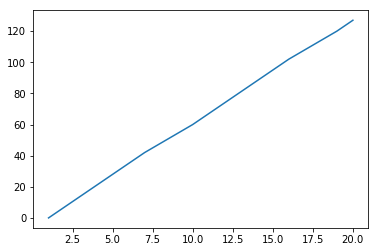

In [60]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*p3_lru_points))
plt.show()

## Part (b)

Recall that the LRU eviction policy removes the least recently used page when the buffer is full and a new page is referenced which is not there in buffer. The basic idea behind LRU is that you timestamp your buffer elements, and use the timestamps to decide when to evict elements. Doing so efficiently, requires some serious book-keeping, this is why in practice many buffer managers try to approximate LRU with other eviction policies that are easier to implement. 

Here we will focus on the _CLOCK_ or _Second Chance_ policy. In the CLOCK eviction policy, the candidate pages for removal are considered left-to-right in a circular manner(with wraparound), and a page that has been accessed between consecutive considerations will not be replaced. The page replaced is the one that - considered in a circular manner - has not been accessed since its last consideration.

In more details the CLOCK policy proceeds maintains a circular list of pages in the buffer and uses an additional _clock (or second chance) bit_ for each page to track how often a page is accessed. The bit is set to 1 whenever a page is referenced. When clock needs to read in a new page in the buffer, it sweeps over existing pages in the buffer looking for one with second chance bit set to 0. It basically replaces pages that have not been referenced for one complete revolution of the clock. 

A high-level implementation of clock:
1. Associate a "second chance" bit with each page in the buffer. Initialize all bits to ZERO (0).
2. Each time a page is referenced in the buffer, set the "second chance" bit to ONE (1). this will give the page a second chance...
3. A new page read into a buffer page has the second chance bit set to ZERO (0).
4. When you need to find a page for removal, look in left-to-right in a circular manner(with wraparound) in the buffer pages:
    - If the second chance bit is ONE, reset its second chance bit (to ZERO) and continue.
    - If the second chance bit is ZERO, replace the page in the buffer.
    
You can find more details on CLOCK [here](http://cseweb.ucsd.edu/classes/wi08/cse221-a/papers/carr81.pdf).


### Part (b.i)
**_[8% points]_**

Write a python function `clock_cost(N,M,B)` that computes the IO cost of the CLOCK eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages.  Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [71]:
def clock_cost(N, M, B):
    # YOUR CODE HERE
    clk = [0]*(B+1)
    buf = [None]*(B+1)
    arm = 0
    read = 0 
    for m in range(M):
        for n in range(N):
                if n not in buf :
                    if None in buf :
                        # case : buffer is not full
                        idx = buf.index(None)
                        buf[idx] = n
                        clk[idx] = 1
                    else :
                        # case : need to evict 
                        while clk[arm] == 1:
                            clk[arm] = 0
                            arm = (arm+1)%len(buf)
                        buf[arm] = n 
                    read +=1
                    clk[arm] = 0
                    arm = (arm+1)%len(buf)
                else :
                    clk[idx] = 1 
    #print(buf)
clock_cost(1,2,3)

### Part (b.ii)
**_[2% point]_**

Now that you have written the CLOCK cost function, provide the tuples which generate the plot of **M vs. the absolute value of the difference between LRU and CLOCK in terms of IO cost** for $B=6$, $N=10$, and $M$ between 1 and 20 inclusive (saved as the variable `p3_clock_points`).

In [ ]:
B = 6
N = 10
M = 20
p3_clock_points = [(m, abs(lru_cost(N, m, B) - clock_cost(N, m, B))) for m in range(1, M+1)]

Does the CLOCK eviction policy prevent sequential flooding? How does it perform against LRU? Write a short explanation in the field below.

In [ ]:
# EXPLANATION GOES HERE
# CLOCK eviction policy is similar to LRU, so that it does not prevent the sequential flooding 